In [59]:
source('sfunctions.R')
source('detlearn_analysis.R')

library('rjags')
library('coda')
library('parallel')
library('plyr')
library('ggplot2')
library('gridExtra')

In [3]:
parallelize = T #set to false to debug
completedModelPath = 'mcmc/results/'

Build the directory structure...

In [4]:
paths = buildDirectoryStructure('results/')
paths['completedModelPath'] = completedModelPath

Check for model completion...

In [5]:
modelsComplete = checkForModelCompletion(completedModelPath, outfile=NULL)
if (nrow(subset(modelsComplete, !changePresence)) > 0){stop(p('One or more models is not availabe in',completedModelPath))}

# Extract Model Results

### Split Half Models

In [6]:
lcFileList = paste(completedModelPath, list.files(completedModelPath)[grep('linkingChange_Model.*\\.RData',list.files(completedModelPath))], sep='')
lcInputs.df = data.frame(file = lcFileList, paths['tablePath'], stringsAsFactors=F)
lcInputs = split(lcInputs.df, lcInputs.df$file)

In [7]:
linkingChangeWindowAnalyses = mclapply2(lcInputs, function(lcInput){
    processModelReturnData(lcInput$file, overwrite=T, lcInput$tablePath)
}, parallelize=F)

### Sliding Window Models

In [67]:
swFileList = paste(completedModelPath, list.files(completedModelPath)[grep('linking_Model.*\\.RData',list.files(completedModelPath))], sep='')
swInputs.df = data.frame(file = swFileList, paths['tablePath'], stringsAsFactors=F)
swInputs = split(swInputs.df, swInputs.df$file)

In [68]:
slidingWindowAnalyses = mclapply2(swInputs, function(swInput){
    processModelReturnData(swInput$file, overwrite=T, swInput$tablePath)
})

# Convergence Statistics

In [89]:
convergenceTable = do.call('rbind',lapply(c('all_LN','singulars_LN','all_FN','singulars_LN','all_standard','singulars_standard','all_standard','none_standard'), function(dataPrep){
    mr = getModelResults(paths[['tablePath']],'linking', dataPrep)
    data.frame(dataPrep, numConverged = length(which(!is.na(mr$nu.child_mean))), numTotal = length(mr$nu.child_mean))
}))
convergenceTable$propFailed = convergenceTable$numConverged / convergenceTable$numTotal
print(convergenceTable)

            dataPrep numConverged numTotal propFailed
1             all_LN          160      205  0.7804878
2       singulars_LN          145      145  1.0000000
3             all_FN          176      180  0.9777778
4       singulars_LN          145      145  1.0000000
5       all_standard          121      122  0.9918033
6 singulars_standard          101      101  1.0000000
7       all_standard          121      122  0.9918033
8      none_standard           80       80  1.0000000


# Split Half Plots

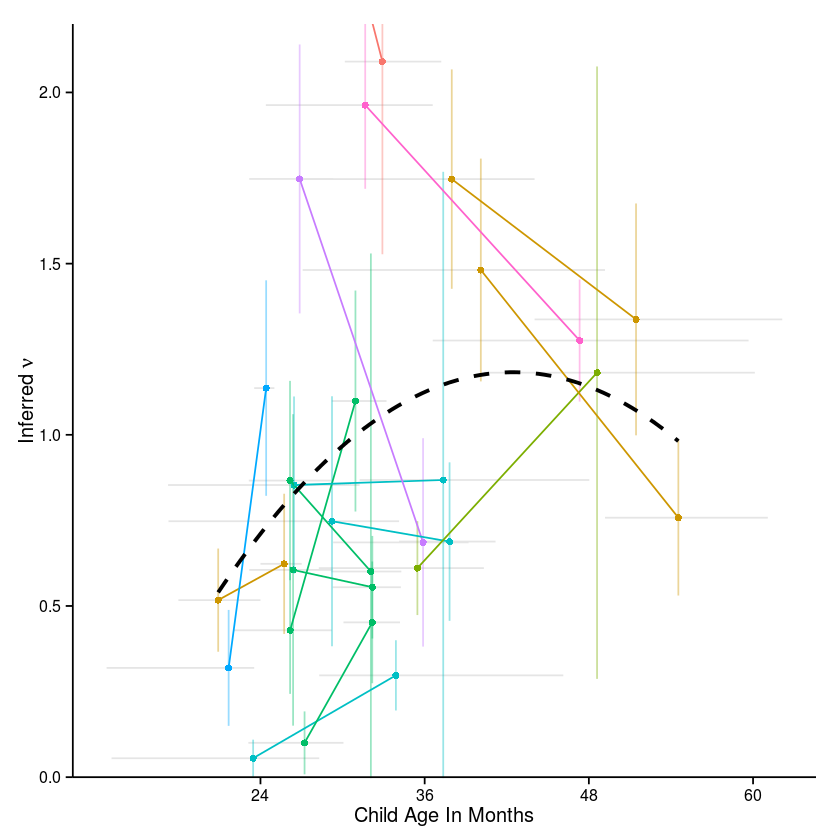

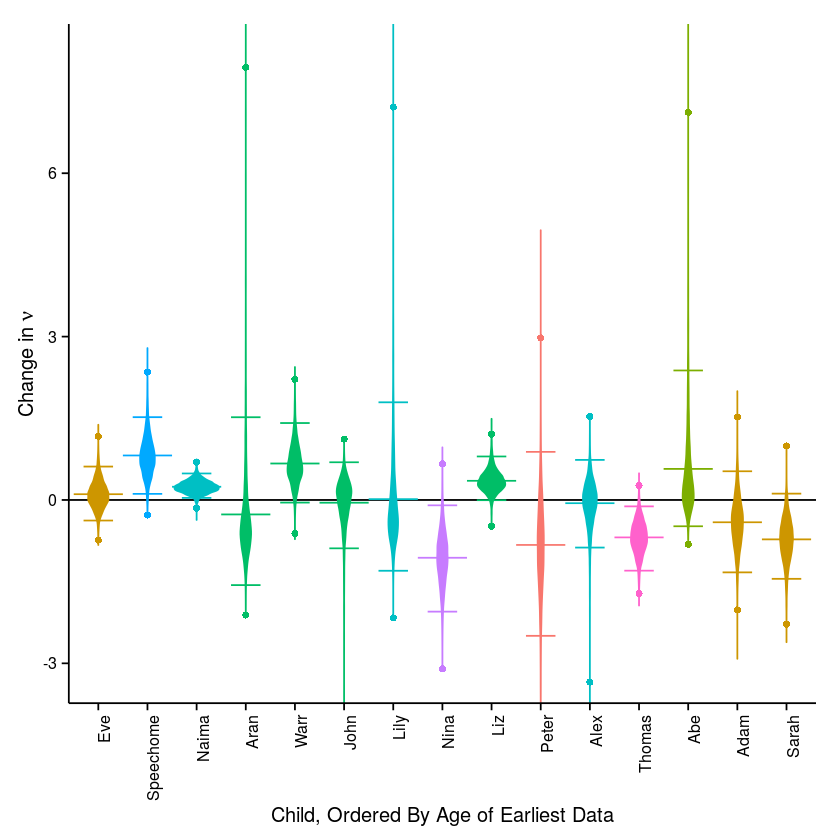

In [19]:
shp = makeSplitHalfPlots(paths, 'singulars_LN')
print(shp[['splitHalfTimeCourse']])

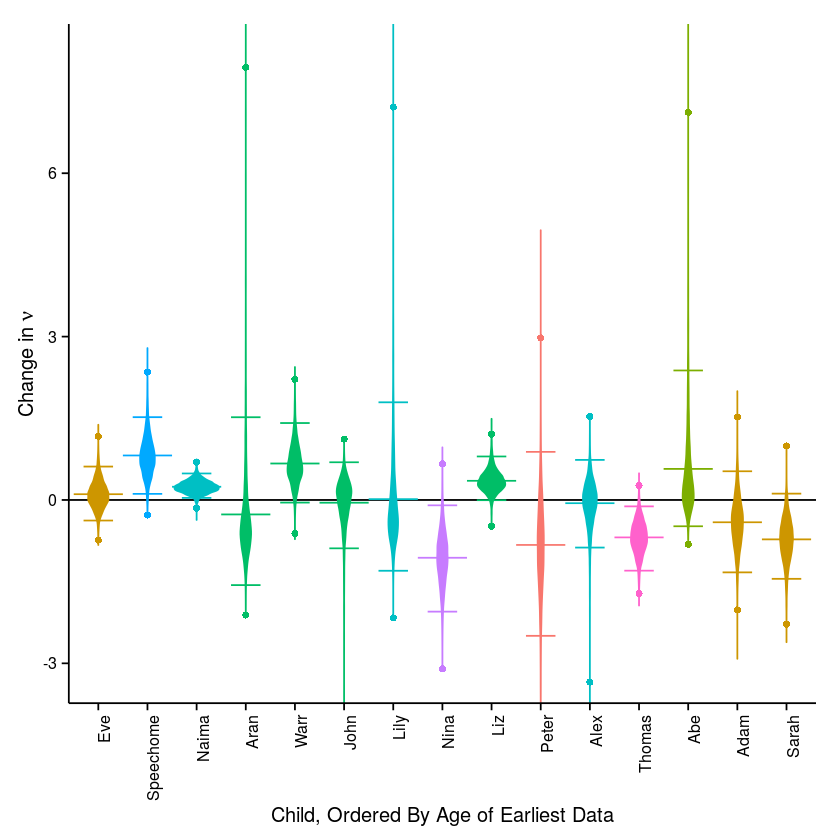

In [38]:
print(shp[['violinPlot']])

[1] "model results build"
[1] "corpus info restored"
[1] "refset subsetted"
[1] "child identities assigned"
[1] "phase1NuComparison printed"
[1] "phase2NuComparison printed"
[1] "nu differences retrieved"
[1] 1084.791 1086.443 1082.909 1080.305 1081.797 1078.275
[1] "nu differences manipulated"


Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_segment).

[1] "nu comparison printed"


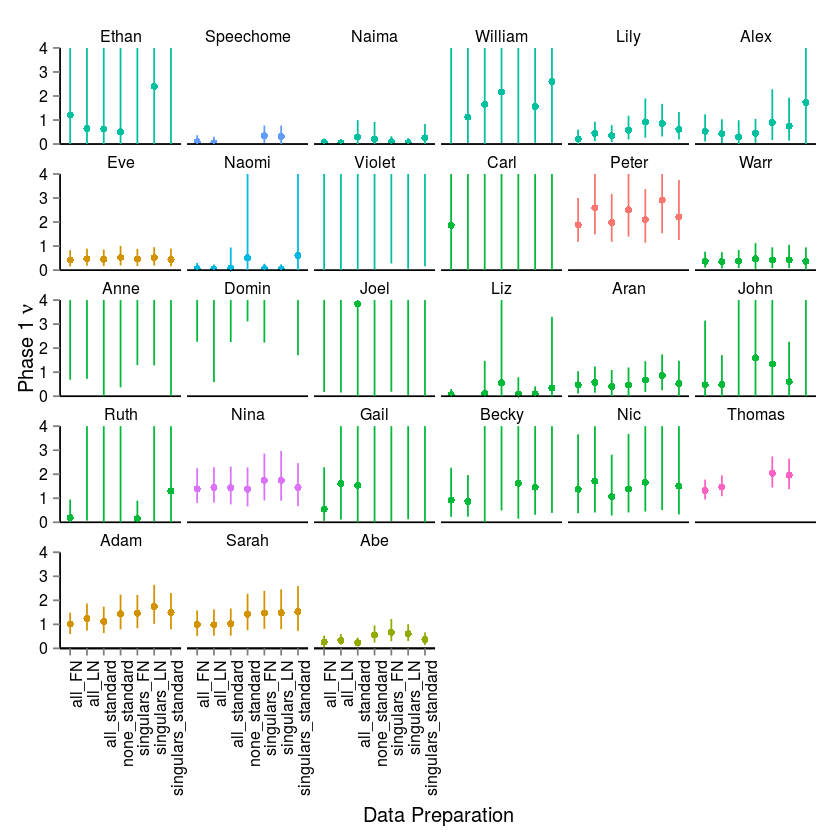

Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 1 rows containing missing values (geom_segment).

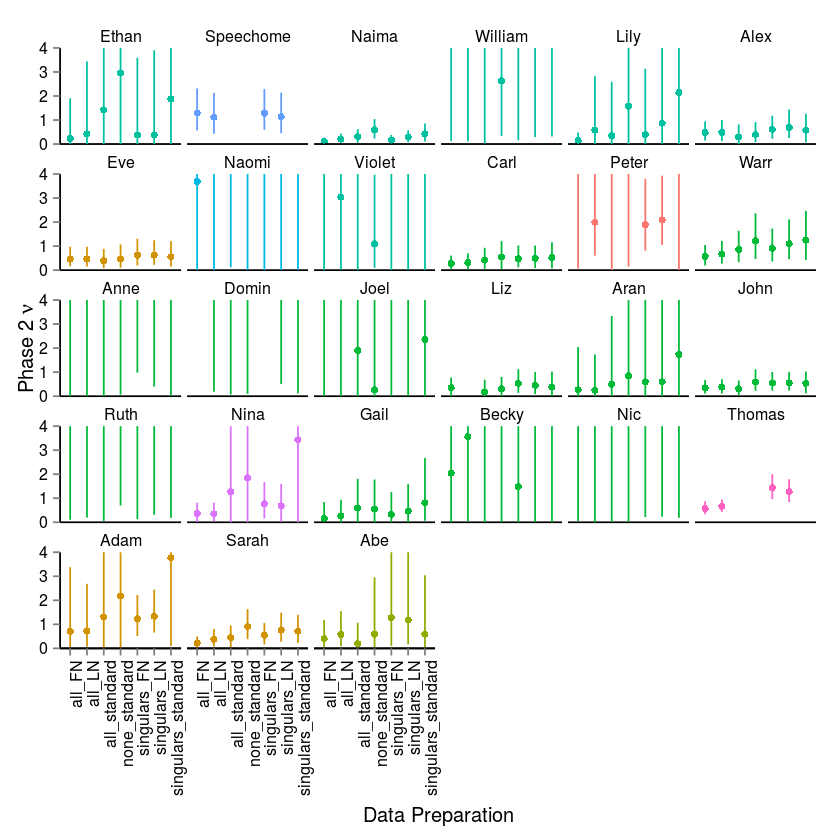

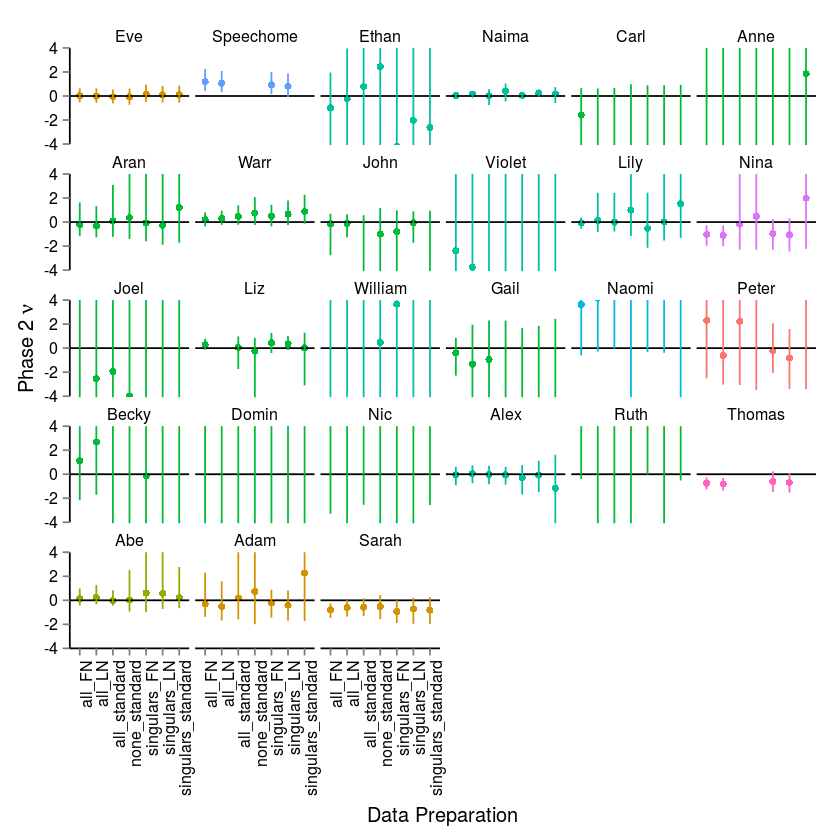

In [60]:
shc = splitHalfComparison(paths)
print(shc[['phase1NuComparison']])

In [ ]:
print(shc[['phase2NuComparison']])

In [ ]:
print(shc[['nuDifference']])

# Sliding Window Plots

TableGrob (1 x 3) "arrange": 3 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (1-1,3-3) arrange gtable[layout]


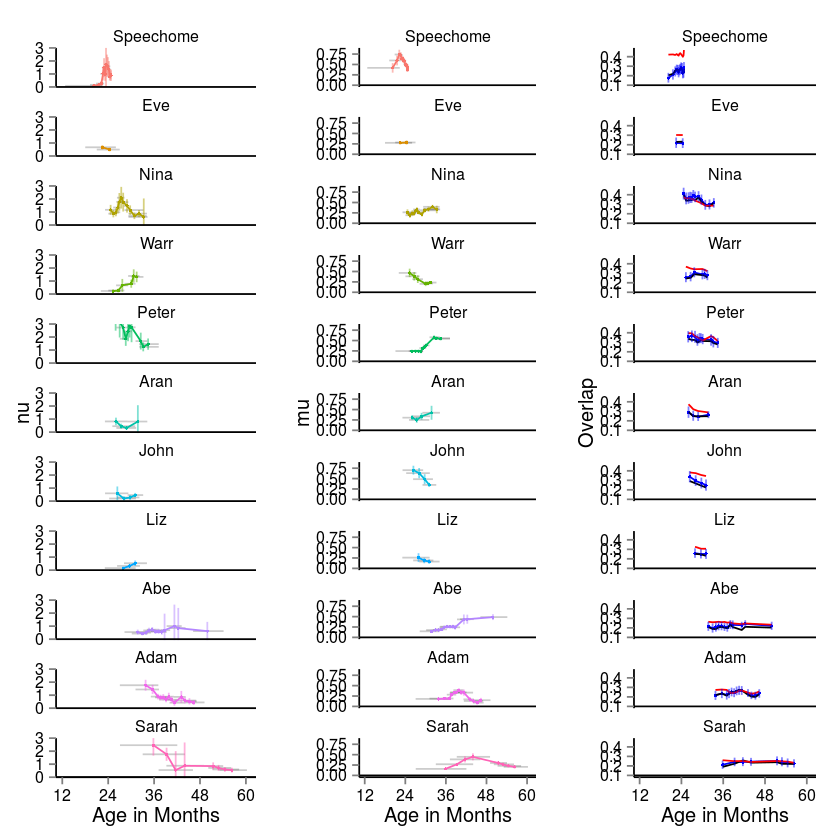

In [81]:
swp = makeSlidingWindowPlots(paths, 'singulars_LN', shp[['childrenToKeep']])
print(swp)

# Correlations

In [82]:
source('detlearn_analysis.R')
cors = getCorrelations(paths)
print(cors)

$slidingWindow
            dataPrep childYangPredictedOverlap childYangPredictedOverlap_RMSE
1             all_LN                 0.6078295                     0.07293409
2             all_FN                 0.6423936                     0.07616245
3       all_standard                 0.7163481                     0.07315509
4      none_standard                 0.7437452                     0.08072345
5       singulars_LN                 0.5531812                     0.07751868
6       singulars_FN                 0.6991347                     0.08138205
7 singulars_standard                 0.7600046                     0.07029120
  childOverlap_RMSE childYangPredictedOverlap1 currentModel1
1        0.02163826                  0.4964486     0.9689385
2        0.02099506                  0.3649476     0.9611164
3        0.02113294                  0.6866111     0.9396994
4        0.02715029                  0.4922488     0.9547281
5        0.02488588                  0.3144724     0.967